In [1]:
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Malgun Gothic"
plt.rcParams["axes.unicode_minus"] = False

In [2]:
import numpy as np
import pandas as pd
import re
from konlpy.tag import Okt
from tqdm import tqdm

In [3]:
data = pd.read_table("C:\\temf\\ratings.txt")
data.head()

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1


In [4]:
data["document"].nunique()

194543

In [5]:
# 중복 제거
data.drop_duplicates(subset=["document"], inplace=True)

In [6]:
len(data)

194544

<AxesSubplot:>

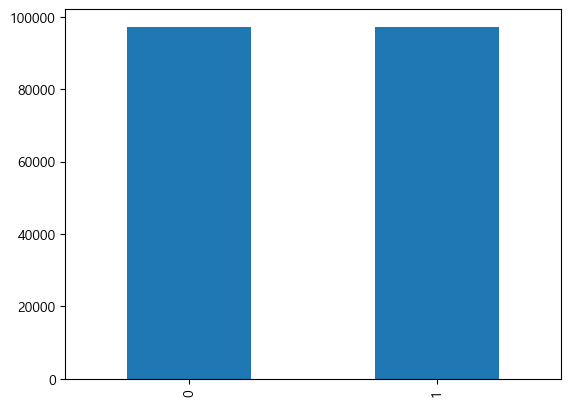

In [7]:
data["label"].value_counts().plot(kind="bar")

In [8]:
data.groupby("label").size().reset_index(name="count")

,label,count
0,0,97277
1,1,97267


In [9]:
data.isnull().values.any()

True

In [10]:
data.isnull().sum()

id          0
document    1
label       0
dtype: int64

In [11]:
data.loc[data.document.isnull()]

,id,document,label
46471,6369843,NaN,1


In [12]:
data.dropna(inplace=True)

In [13]:
data.isnull().sum()

id          0
document    0
label       0
dtype: int64

In [14]:
len(data)

194543

In [15]:
data["document"] = data["document"].str.replace("[^ㄱ-하-ㅣ가힣]","")

C:\Users\user\AppData\Local\Temp\ipykernel_1192\646225305.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data["document"] = data["document"].str.replace("[^ㄱ-하-ㅣ가힣]","")


In [16]:
data["document"].replace("", np.nan, inplace=True)

In [17]:
data.dropna(inplace=True)
data.isnull().sum()

id          0
document    0
label       0
dtype: int64

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.document,
                                                    data.label,
                                                    random_state=1234)

In [19]:
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로',
             '자','에','와','한','하다']

In [20]:
okt = Okt()

In [28]:
okt.morphs("오늘 날씨가 추워서 기분이 좋지않다", stem=True)

['오늘', '날씨', '가', '춥다', '기분', '이', '좋다', '않다']

In [29]:
X_train = X_train[:10000]
X_test = X_test[:10000]
y_train = y_train[:10000]
y_test = y_test[:10000]

In [30]:
train_x = []

for s in tqdm(X_train):
    temp_x = []
    temp_x = okt.morphs(s, stem=True)
    temp_x = [word for word in temp_x if not word in stopwords]
    train_x.append(temp_x)

100%|██████████| 10000/10000 [01:31<00:00, 109.11it/s]


In [31]:
test_x = []

for s in tqdm(X_test):
    temp_x = []
    temp_x = okt.morphs(s, stem=True)
    temp_x = [word for word in temp_x if not word in stopwords]
    test_x.append(temp_x)

100%|██████████| 10000/10000 [01:37<00:00, 102.55it/s]


#### Word2Vec

In [32]:
from gensim.models import Word2Vec

In [34]:
w2v = Word2Vec(train_x, vector_size= 300, window=3, min_count=5)

In [35]:
word_vectors = w2v.wv

In [54]:
vocabs = word_vectors.key_to_index

In [55]:
word_vectors_list = [word_vectors[v] for v in vocabs]

In [56]:
word_vectors_list[:1]

[array([-2.40090955e-02,  3.65090907e-01,  2.05336437e-02,  1.81614041e-01,
         6.05320334e-02, -2.47453958e-01,  2.23493382e-01,  6.72335327e-01,
         9.36673507e-02, -6.23529889e-02,  5.02594337e-02, -2.95155674e-01,
         8.67623538e-02, -4.32313532e-02, -2.47247949e-01, -2.06124499e-01,
         2.25482479e-01, -1.19071770e-02,  7.76485633e-03, -1.37817040e-01,
        -1.50805965e-01, -2.64313892e-02,  2.20763505e-01,  4.17628363e-02,
         2.22570479e-01,  3.03875413e-02, -2.80508578e-01,  4.11541499e-02,
        -1.62170976e-01, -3.05706441e-01,  6.98432103e-02, -9.37404782e-02,
         5.84497466e-04, -3.66787650e-02, -1.10227838e-02,  1.02988720e-01,
         5.47199138e-02, -3.41454178e-01, -3.78923723e-03,  2.10739356e-02,
        -5.78289479e-02,  8.18153620e-02, -2.88699213e-02, -2.49070704e-01,
         1.90029383e-01,  2.72849500e-01,  1.11232465e-02,  1.09257579e-01,
         5.35194250e-03,  2.48503417e-01,  2.58720219e-02,  7.47967213e-02,
        -6.3

In [59]:
# 유사한 단어 추출
w2v.wv.most_similar("관객")

[('전', 0.9997943639755249),
 ('데', 0.9997907876968384),
 ('때문', 0.999789834022522),
 ('우리', 0.9997849464416504),
 ('지다', 0.9997844099998474),
 ('건지다', 0.9997806549072266),
 ('라', 0.9997804760932922),
 ('쓰다', 0.9997798800468445),
 ('년', 0.9997785687446594),
 ('아니다', 0.9997782111167908)]

In [60]:
# 학습된 모델 저장
w2v.save("w2v.bin")

In [61]:
# 저장된 모델 불러오기
saved_w2v = Word2Vec.load("w2v.bin")